In [1]:
import yfinance as yf
import pandas
import numpy
import matplotlib.pyplot as plt
import math
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'INTC', 'AMD', 'NVDA', 'F', 'TSLA', 'JPM', 'MS', 'VOO']
data_dec_2021 = yf.download(tickers, start='2021-12-01', end='2022-01-01', interval='1mo', progress=False)['Close'].dropna()
latest_prices_data_dec_2021 = get_latest_prices(data_dec_2021)

data_2022 = yf.download(tickers, start='2021-12-01', end='2022-07-01', interval='1mo', progress=False)['Close'].dropna()

In [2]:
### Portfolio based only on known data
weights_basic = {}
weights_basic['AMD'] = 0.00892
weights_basic['AMZN'] = 0.14382
weights_basic['F'] = 0.03027
weights_basic['GOOG'] = 0.05891
weights_basic['INTC'] = 0.23247
weights_basic['JPM'] = 0.10737
weights_basic['MSFT'] = 0.17157
weights_basic['NVDA'] = 0.09703
weights_basic['VOO'] = 0.14964

balance_usd = 100_000
balance_remain = balance_usd
stocks_basic = {}
for key in weights_basic:
    spent_usd = balance_usd * weights_basic[key]
    one_stock_price = latest_prices_data_dec_2021[key]
    stocks_number = spent_usd // one_stock_price
    stocks_basic[key] = stocks_number
    balance_remain = balance_remain - (stocks_number * one_stock_price)
print('Portfolio based only on known data:', stocks_basic)
print('Remaining balance: USD', balance_remain)
print(' - - - - - ')

balance_wo_pred_array = []
for month in data_2022.index:
    usd_balance = balance_remain
    for key in stocks_basic:
        usd_balance = usd_balance + (data_2022[key][month] * stocks_basic[key])
    balance_wo_pred_array.append(usd_balance)
print('Balance history without prediction =', balance_wo_pred_array)

Portfolio based only on known data: {'AMD': 6.0, 'AMZN': 86.0, 'F': 145.0, 'GOOG': 40.0, 'INTC': 451.0, 'JPM': 67.0, 'MSFT': 51.0, 'NVDA': 32.0, 'VOO': 34.0}
Remaining balance: USD 756.9376411437988
 - - - - - 
Balance history without prediction = [100000.0, 92412.17966461182, 90346.26678657532, 93524.80358505249, 79230.69672775269, 79893.63344955444, 70498.47682476044]


In [3]:
### Portfolio based on LSTM one month prediction
weights_basic = {}
weights_basic['AMD'] = 0.02014
weights_basic['AMZN'] = 0.15413
weights_basic['F'] = 0.02581
weights_basic['GOOG'] = 0.06402
weights_basic['INTC'] = 0.25194
weights_basic['JPM'] = 0.1044
weights_basic['MSFT'] = 0.15357
weights_basic['NVDA'] = 0.07661
weights_basic['VOO'] = 0.14938

balance_usd = 100_000
balance_remain = balance_usd
stocks_basic = {}
for key in weights_basic:
    spent_usd = balance_usd * weights_basic[key]
    one_stock_price = latest_prices_data_dec_2021[key]
    stocks_number = spent_usd // one_stock_price
    stocks_basic[key] = stocks_number
    balance_remain = balance_remain - (stocks_number * one_stock_price)
print('Portfolio based on data with LSTM prediction:', stocks_basic)
print('Remaining balance: USD', balance_remain)
print(' - - - - - ')

balance_with_LSTM_prediction = []
for month in data_2022.index:
    usd_balance = balance_remain
    for key in stocks_basic:
        usd_balance = usd_balance + (data_2022[key][month] * stocks_basic[key])
    balance_with_LSTM_prediction.append(usd_balance)
print('Balance history with LSTM prediction =', balance_with_LSTM_prediction)

Portfolio based on data with LSTM prediction: {'AMD': 13.0, 'AMZN': 92.0, 'F': 124.0, 'GOOG': 44.0, 'INTC': 489.0, 'JPM': 65.0, 'MSFT': 45.0, 'NVDA': 26.0, 'VOO': 34.0}
Remaining balance: USD 749.0676727294922
 - - - - - 
Balance history with LSTM prediction = [100000.0, 92440.91463470459, 90567.11878585815, 93587.40674209595, 79369.42181015015, 80160.87646484375, 70612.75694274902]


In [4]:
### Portfolio based on MLR one month prediction
weights_basic = {}
weights_basic['AMD'] = 0.00925
weights_basic['AMZN'] = 0.14413
weights_basic['F'] = 0.03003
weights_basic['GOOG'] = 0.05887
weights_basic['INTC'] = 0.23252
weights_basic['JPM'] = 0.10767
weights_basic['MSFT'] = 0.1716
weights_basic['NVDA'] = 0.09668
weights_basic['VOO'] = 0.14926

balance_usd = 100_000
balance_remain = balance_usd
stocks_basic = {}
for key in weights_basic:
    spent_usd = balance_usd * weights_basic[key]
    one_stock_price = latest_prices_data_dec_2021[key]
    stocks_number = spent_usd // one_stock_price
    stocks_basic[key] = stocks_number
    balance_remain = balance_remain - (stocks_number * one_stock_price)
print('Portfolio based on data with MLR prediction:', stocks_basic)
print('Remaining balance: USD', balance_remain)
print(' - - - - - ')

balance_with_MLR_prediction = []
for month in data_2022.index:
    usd_balance = balance_remain
    for key in stocks_basic:
        usd_balance = usd_balance + (data_2022[key][month] * stocks_basic[key])
    balance_with_MLR_prediction.append(usd_balance)
print('Balance history with MLR prediction =', balance_with_MLR_prediction)

Portfolio based on data with MLR prediction: {'AMD': 6.0, 'AMZN': 86.0, 'F': 144.0, 'GOOG': 40.0, 'INTC': 451.0, 'JPM': 67.0, 'MSFT': 51.0, 'NVDA': 32.0, 'VOO': 34.0}
Remaining balance: USD 777.7076416015625
 - - - - - 
Balance history with MLR prediction = [100000.0, 92412.64966583252, 90349.47678756714, 93528.66358566284, 79237.30672836304, 79900.72344970703, 70508.11682510376]


In [5]:
print("Basic portfolio Jul 2022 balance =", balance_wo_pred_array[len(balance_wo_pred_array) - 1])
print("Portfolio with LSTM Jul 2022 balance =", balance_with_LSTM_prediction[len(balance_with_LSTM_prediction) - 1])
delta = abs((balance_with_LSTM_prediction[len(balance_with_LSTM_prediction)-1]) - (balance_wo_pred_array[len(balance_wo_pred_array)-1]))
print("\t delta = USD", delta)
print("Portfolio with MLR Jul 2022 balance =", balance_with_MLR_prediction[len(balance_with_MLR_prediction) - 1])
delta = abs((balance_with_MLR_prediction[len(balance_with_MLR_prediction)-1]) - (balance_wo_pred_array[len(balance_wo_pred_array)-1]))
print("\t delta = USD", delta)

Basic portfolio Jul 2022 balance = 70498.47682476044
Portfolio with LSTM Jul 2022 balance = 70612.75694274902
	 delta = USD 114.28011798858643
Portfolio with MLR Jul 2022 balance = 70508.11682510376
	 delta = USD 9.640000343322754


[0, 0.38, 2.29, 0.97, 0.67, 1.33, 0.39]


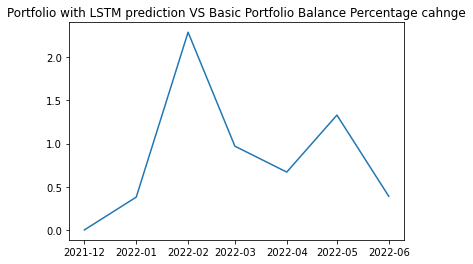

In [6]:
delta_percents = []
for i in range(len(data_2022.index)):
    loss_wo_pred = 100_000 - balance_wo_pred_array[i]
    loss_with_prediction = 100_000 - balance_with_LSTM_prediction[i]
    if loss_wo_pred == loss_with_prediction:
        delta_percents.append(0)
    elif loss_wo_pred > loss_with_prediction:
        percents = 100 - ((loss_with_prediction / loss_wo_pred) * 100)
        delta_percents.append(round(percents, 2))
    else:
        percents = 100 - ((loss_wo_pred / loss_with_prediction) * 100)
        delta_percents.append(-1 * round(percents, 2))
print(delta_percents)
x = data_2022.index
plt.plot(x, delta_percents)
plt.title("Portfolio with LSTM prediction VS Basic Portfolio Balance Percentage cahnge")
plt.show()

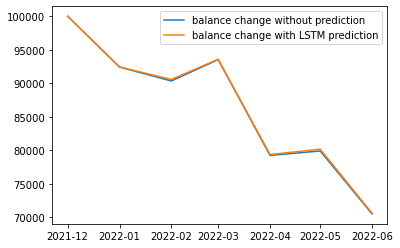

In [7]:
x = data_2022.index
plt.plot(x, balance_wo_pred_array, label = "balance change without prediction")
plt.plot(x, balance_with_LSTM_prediction, label = "balance change with LSTM prediction")
plt.legend()
plt.show()